In [1]:
from pre import complete_data,plot_confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
%matplotlib inline

/home/kevindong1994/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
complete_data.loc[complete_data["class"] ==  " <=50K.","class"]= " <=50K"
complete_data.loc[complete_data["class"] ==  " >50K.","class"]= " >50K"

In [3]:
complete_data = pd.concat([complete_data,pd.get_dummies(complete_data["class"],prefix = "class",drop_first=True)],axis=1)

In [4]:
X = complete_data.loc["train"].drop(list(complete_data.loc["train"].select_dtypes(include="object").dtypes.index)+["class_ >50K"], axis=1)
y = complete_data.loc["train"]["class_ >50K"]

In [5]:
X.columns.values

array(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'capital_gain_extre', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tec

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
clf = MLPClassifier(solver='adam', alpha=1e-3,hidden_layer_sizes=(5,3), random_state=100,max_iter=1000,tol=1e-4)
#mlp = MLPClassifier(solver='adam',alpha=1e-4,hidden_layer_sizes=(5,3))
#cv = KFold(10)
#parameter = {"max_iter":(800,1000,5000),"tol":(1e-6,1e-8)}
#clf = GridSearchCV(mlp,parameter,cv = cv)
clf.fit(X, y)
#clf.best_estimator_

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=100,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [7]:
X_test = complete_data.loc["test"].drop(list(complete_data.loc["train"].select_dtypes(include="object").dtypes.index)+["class_ >50K"], axis=1)
y_test = complete_data.loc["test"]["class_ >50K"]

In [8]:
p = clf.predict(X_test)
p_proba = clf.predict_proba(X_test)

# The accuracy is: 

In [9]:
from sklearn.metrics import accuracy_score
print(accuracy_score(p,y_test))

0.7941772618389534


# Confusion matrix:

In [10]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,p))

[[12113   322]
 [ 3029   817]]


Normalized confusion matrix
[[0.97410535 0.02589465]
 [0.7875715  0.2124285 ]]


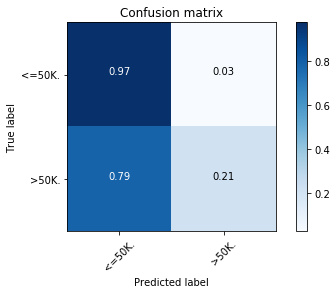

In [11]:
plot_confusion_matrix(confusion_matrix(complete_data.loc["test"]["class_ >50K"],p),
                     classes = np.array(["<=50K.",">50K."]),normalize=True)

# AUC ROC

In [12]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,p_proba[:,1],average="weighted")) # "weighted" accounts for class imbalance by computing the average of binary metrics in which each class’s score is weighted by its presence in the true data sample.

0.6438788930728923


## Perform pretty bad when dealing with unbalanced data.

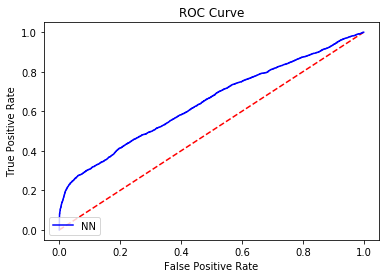

In [13]:
f,ax = plt.subplots()
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.plot([0,1],[0,1],'r--')

from sklearn.metrics import roc_curve
tpr,fpr,_ = roc_curve(y_test,p_proba[:,1])
ax.plot(tpr,fpr,c='b',label="NN")
ax.legend(loc="lower left")
plt.show()